In [1]:
import pandas as pd

# Load the Iris dataset
df = pd.read_csv('/content/drive/MyDrive/iris/Iris.csv')

# Display the first 5 rows
print(df.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [2]:
# Drop 'Id' column
df = df.drop(columns=['Id'])

# Separate features and target
X = df.drop(columns=['Species'])
y = df['Species']


In [3]:
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
from sklearn.model_selection import train_test_split

# 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Try different K values
for k in [1, 3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"K = {k}, Accuracy = {acc:.2f}")


K = 1, Accuracy = 0.98
K = 3, Accuracy = 1.00
K = 5, Accuracy = 1.00
K = 7, Accuracy = 1.00
K = 9, Accuracy = 1.00


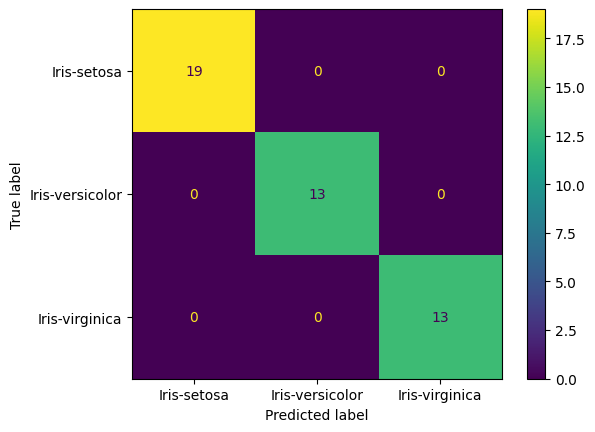

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Train final model with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()


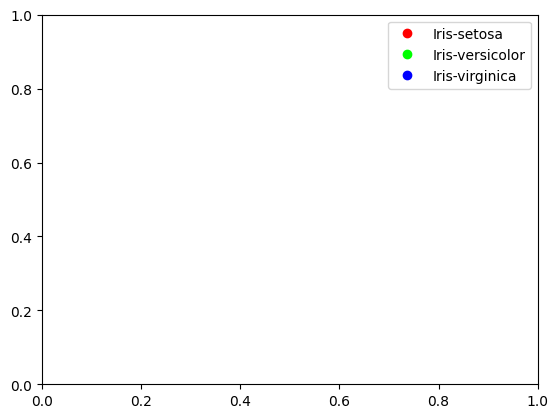

In [9]:
plt.legend(handles=scatter.legend_elements()[0], labels=pd.factorize(y)[1].tolist())


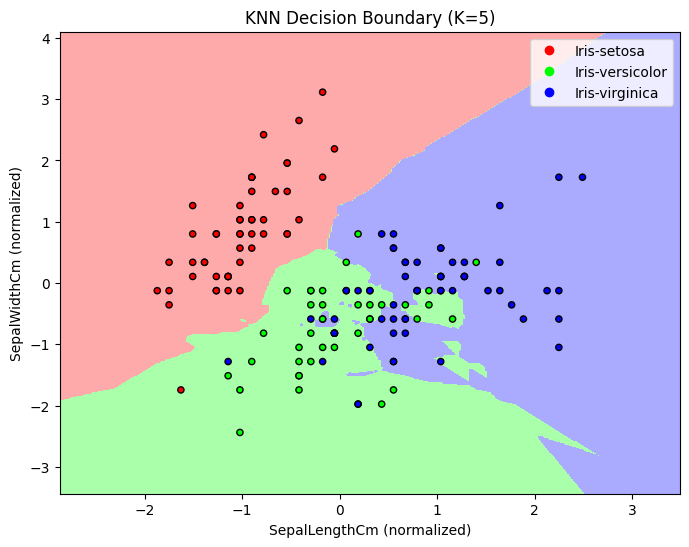

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Use only 2 features for visualization (e.g., SepalLengthCm and SepalWidthCm)
X_vis = X_scaled[:, :2]
y_vis = pd.factorize(y)[0]  # Convert species names to numeric

# Split for visual model training
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, test_size=0.3, random_state=42)

# Fit KNN for visualization
knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_train_vis, y_train_vis)

# Create mesh grid for plotting decision boundary
h = 0.02
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.contourf(xx, yy, Z, cmap=cmap_light)
scatter = plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap=cmap_bold, edgecolor='k', s=20)

plt.xlabel("SepalLengthCm (normalized)")
plt.ylabel("SepalWidthCm (normalized)")
plt.title("KNN Decision Boundary (K=5)")
plt.legend(handles=scatter.legend_elements()[0], labels=pd.factorize(y)[1].tolist())
plt.show()
